In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

# from windwave.defs import Case, Interface2D
# from windwave.prepare import read_p, read_fields

%load_ext autoreload
%autoreload 3

In [10]:
DATAPATH = '/scratch/jw8736/ctr/outputs/'

file = DATAPATH + 'NWP_ZPG_CU4/netcdf/field_eta_t50.nc'
ds1 = xr.open_dataset(file)

(-3.141592653589793, 3.1415926535897927, 0.0, 6.283185307179585)

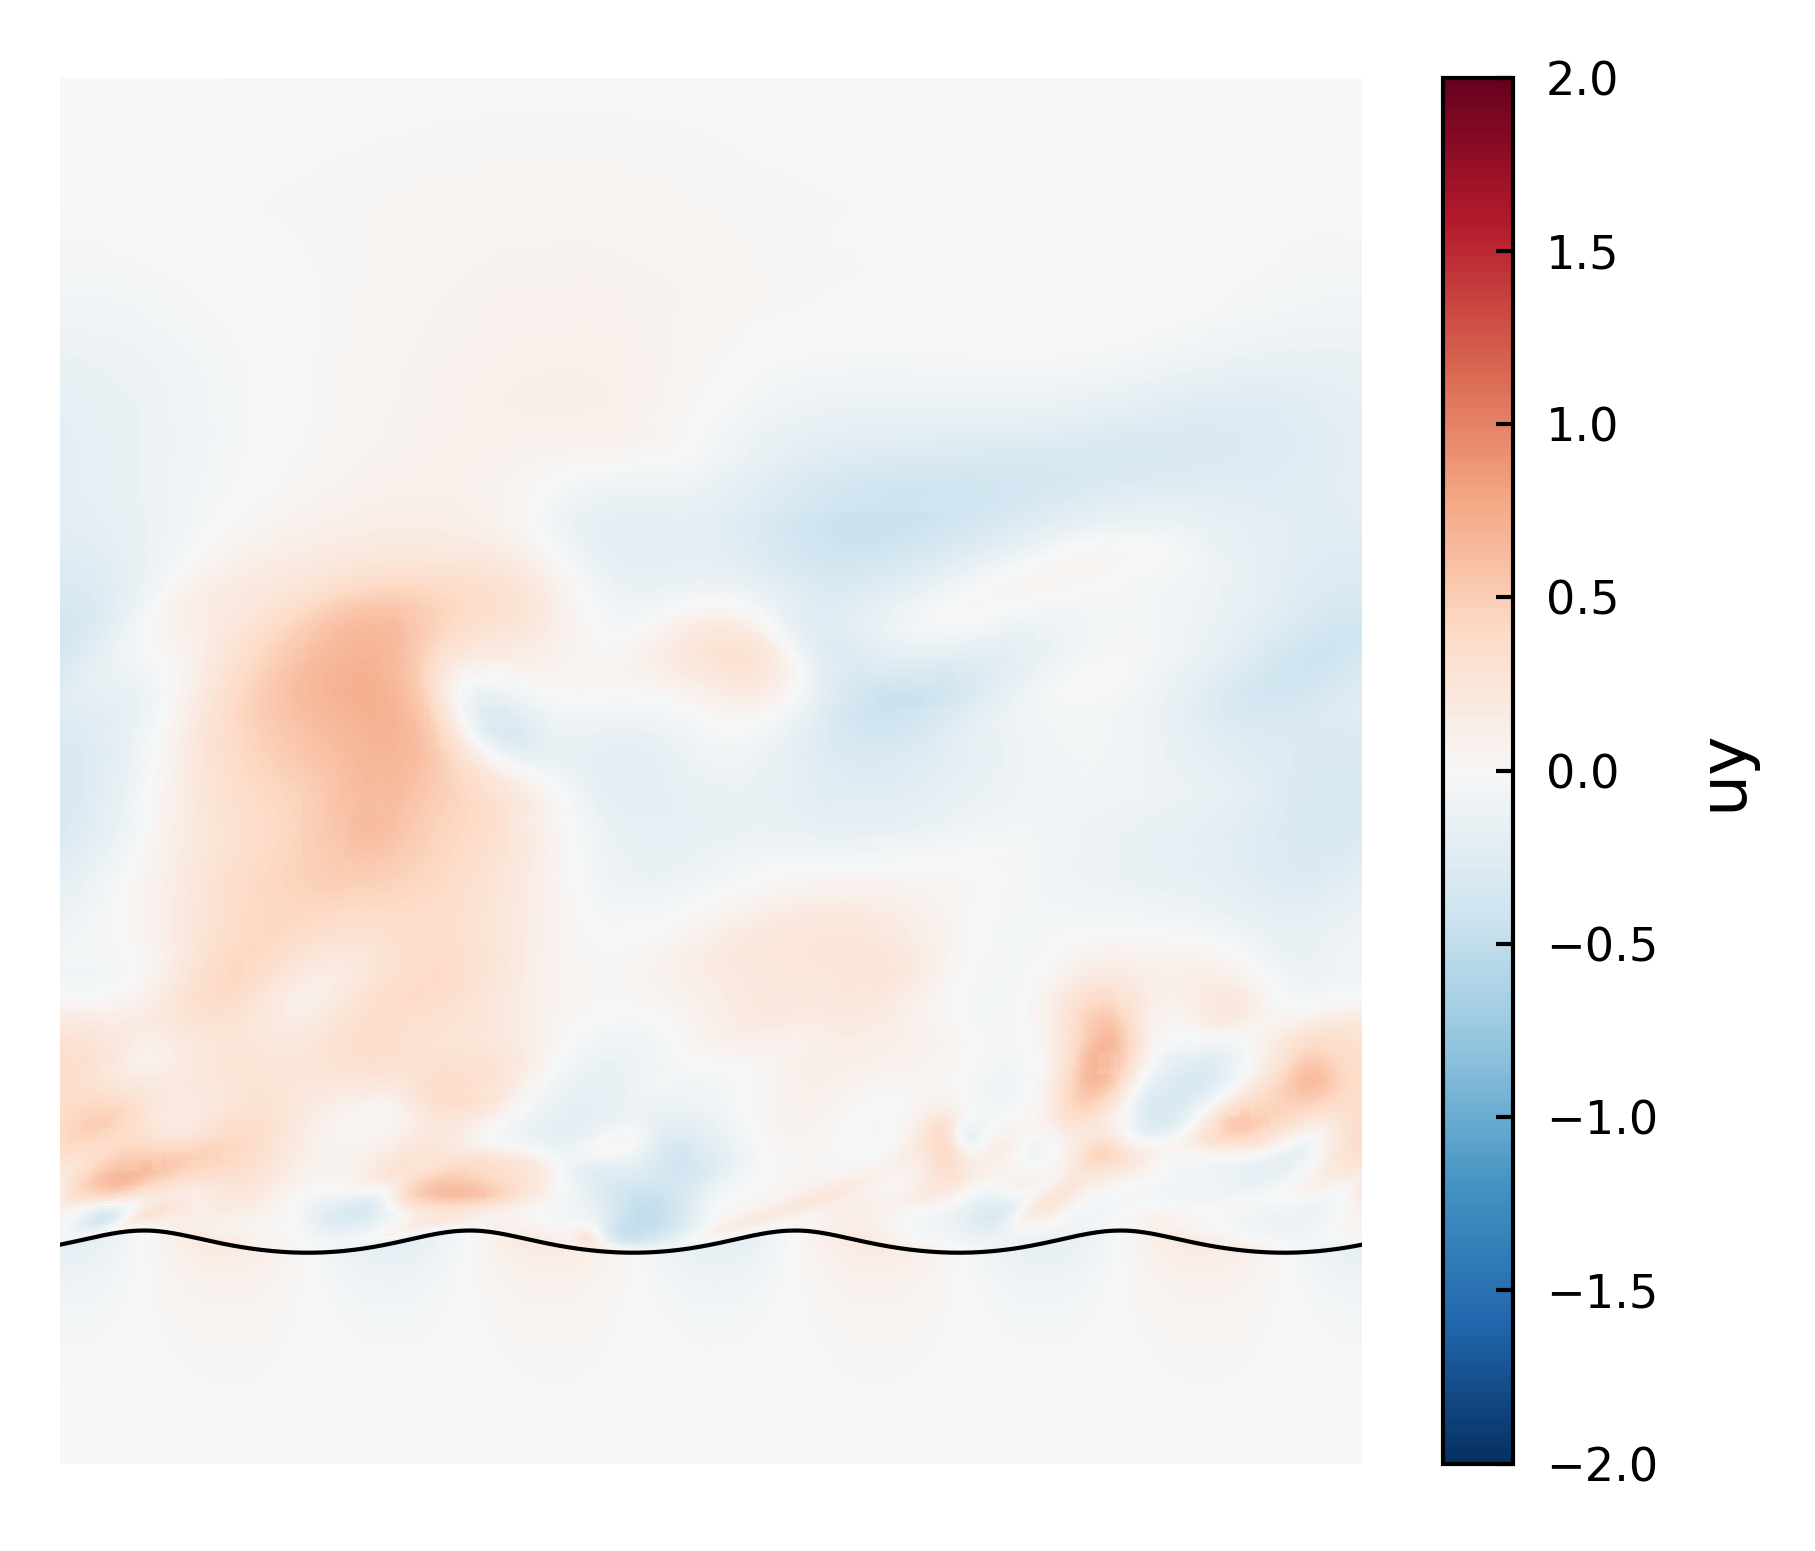

In [11]:
plt.figure(figsize=[3.5,3])
ds1.uy.isel(z=200).plot(x='x', cmap='RdBu_r', vmax=2, vmin=-2)
ds1.eta.mean(dim='z').plot(x='x',c='k')
plt.axis('off')

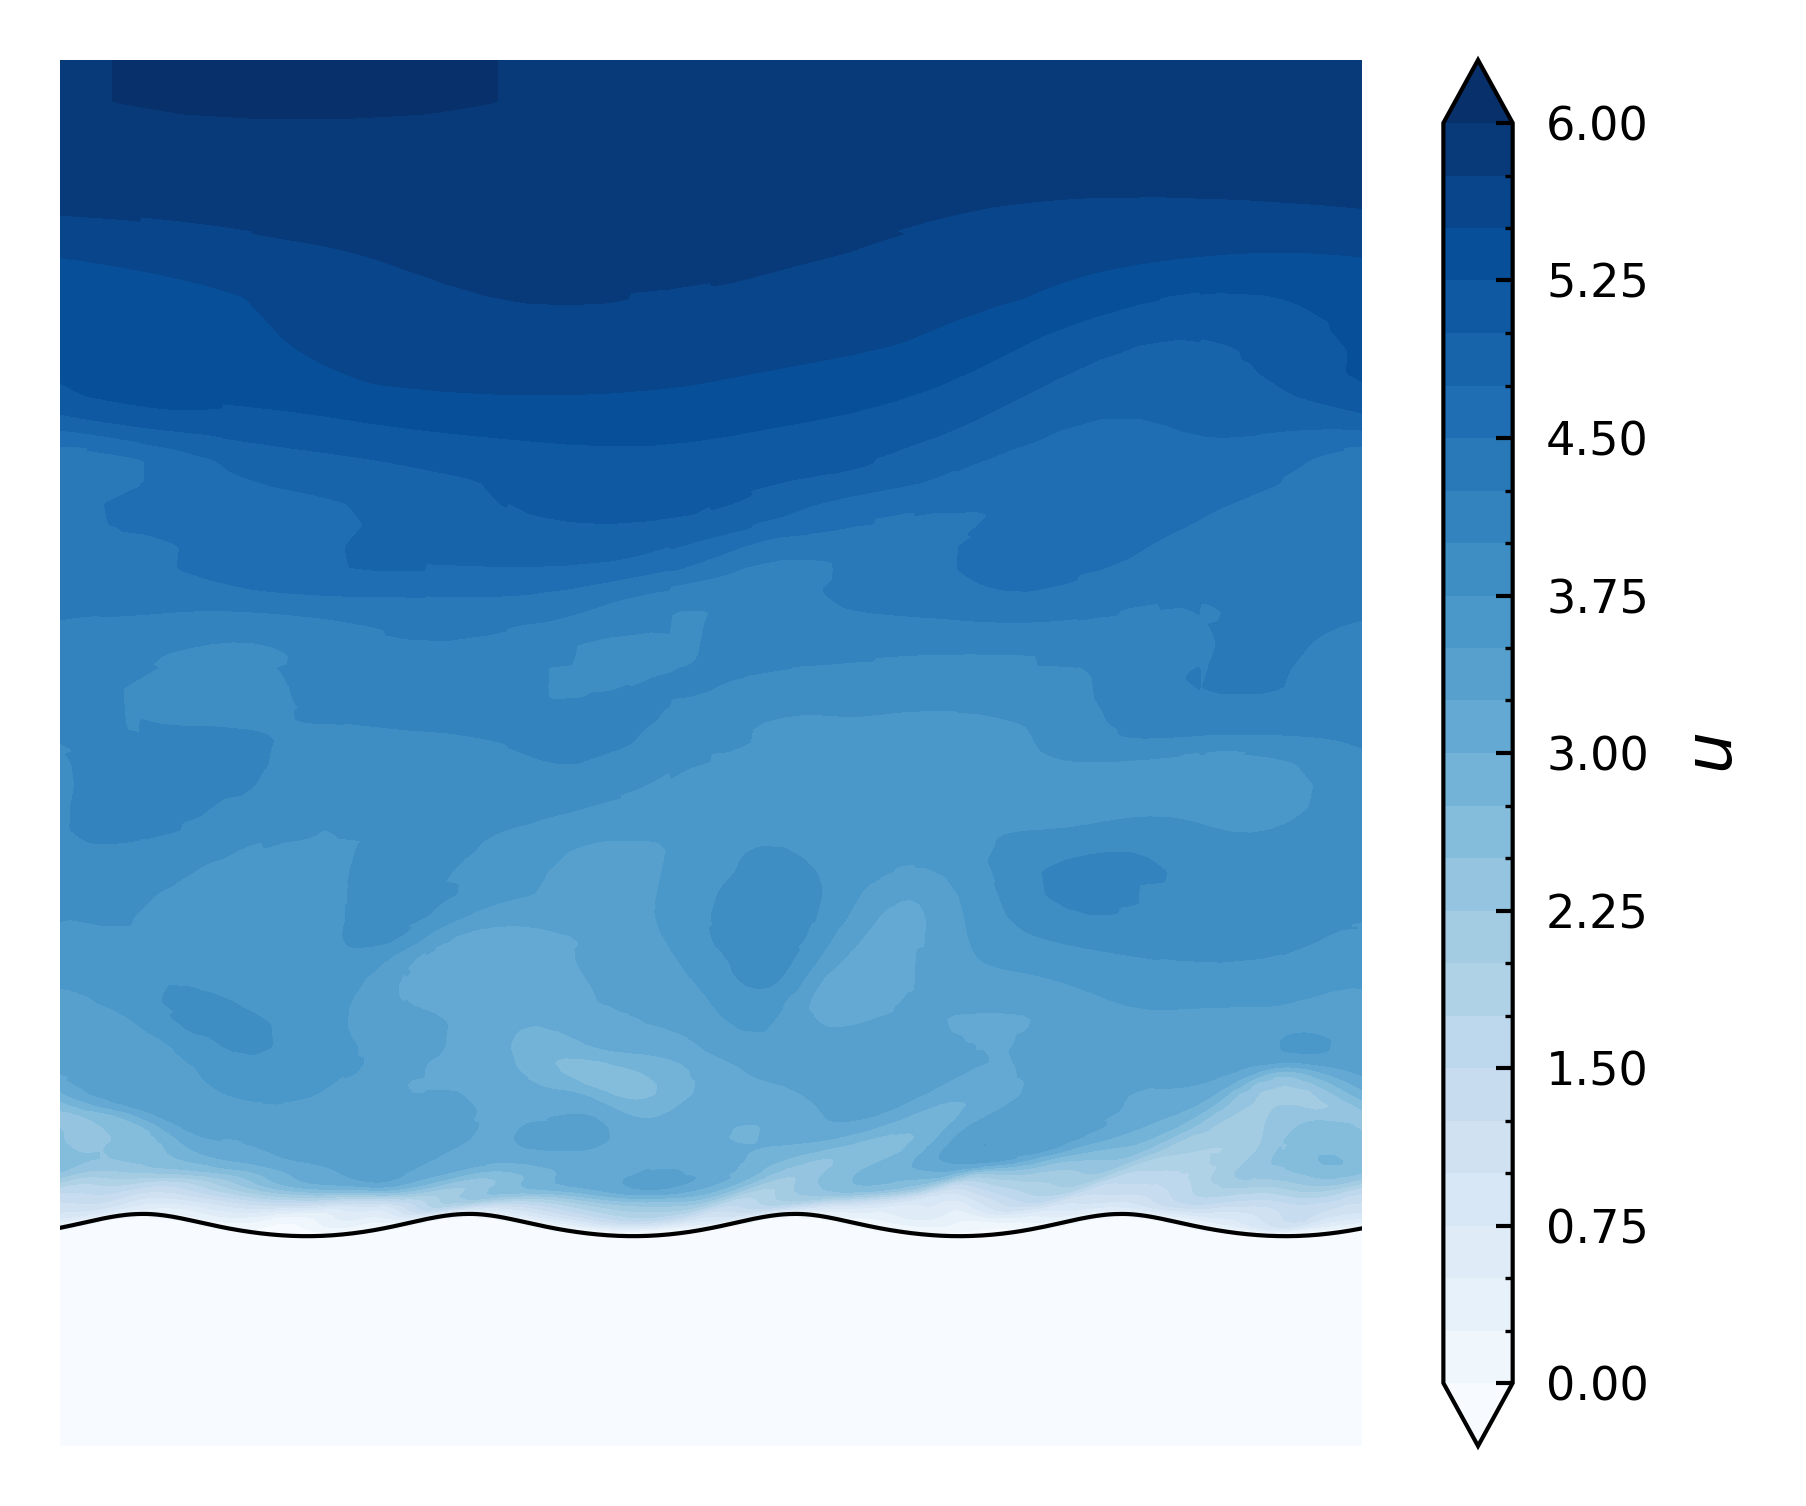

In [13]:
fig = plt.figure(figsize=[3.5,3]); ax = plt.gca()
(ds1.ux.isel(z=400)*(1-ds1.f.isel(z=400))).plot.contourf(ax=ax, x='x', cmap='Blues', levels=25, vmin=0, vmax=6, cbar_kwargs={'label':'$u$'})
ds1.eta.mean(dim='z').plot(ax=ax, x='x',c='k')
ax.axis('off')
fig.savefig('../../plots/illustration.pdf')

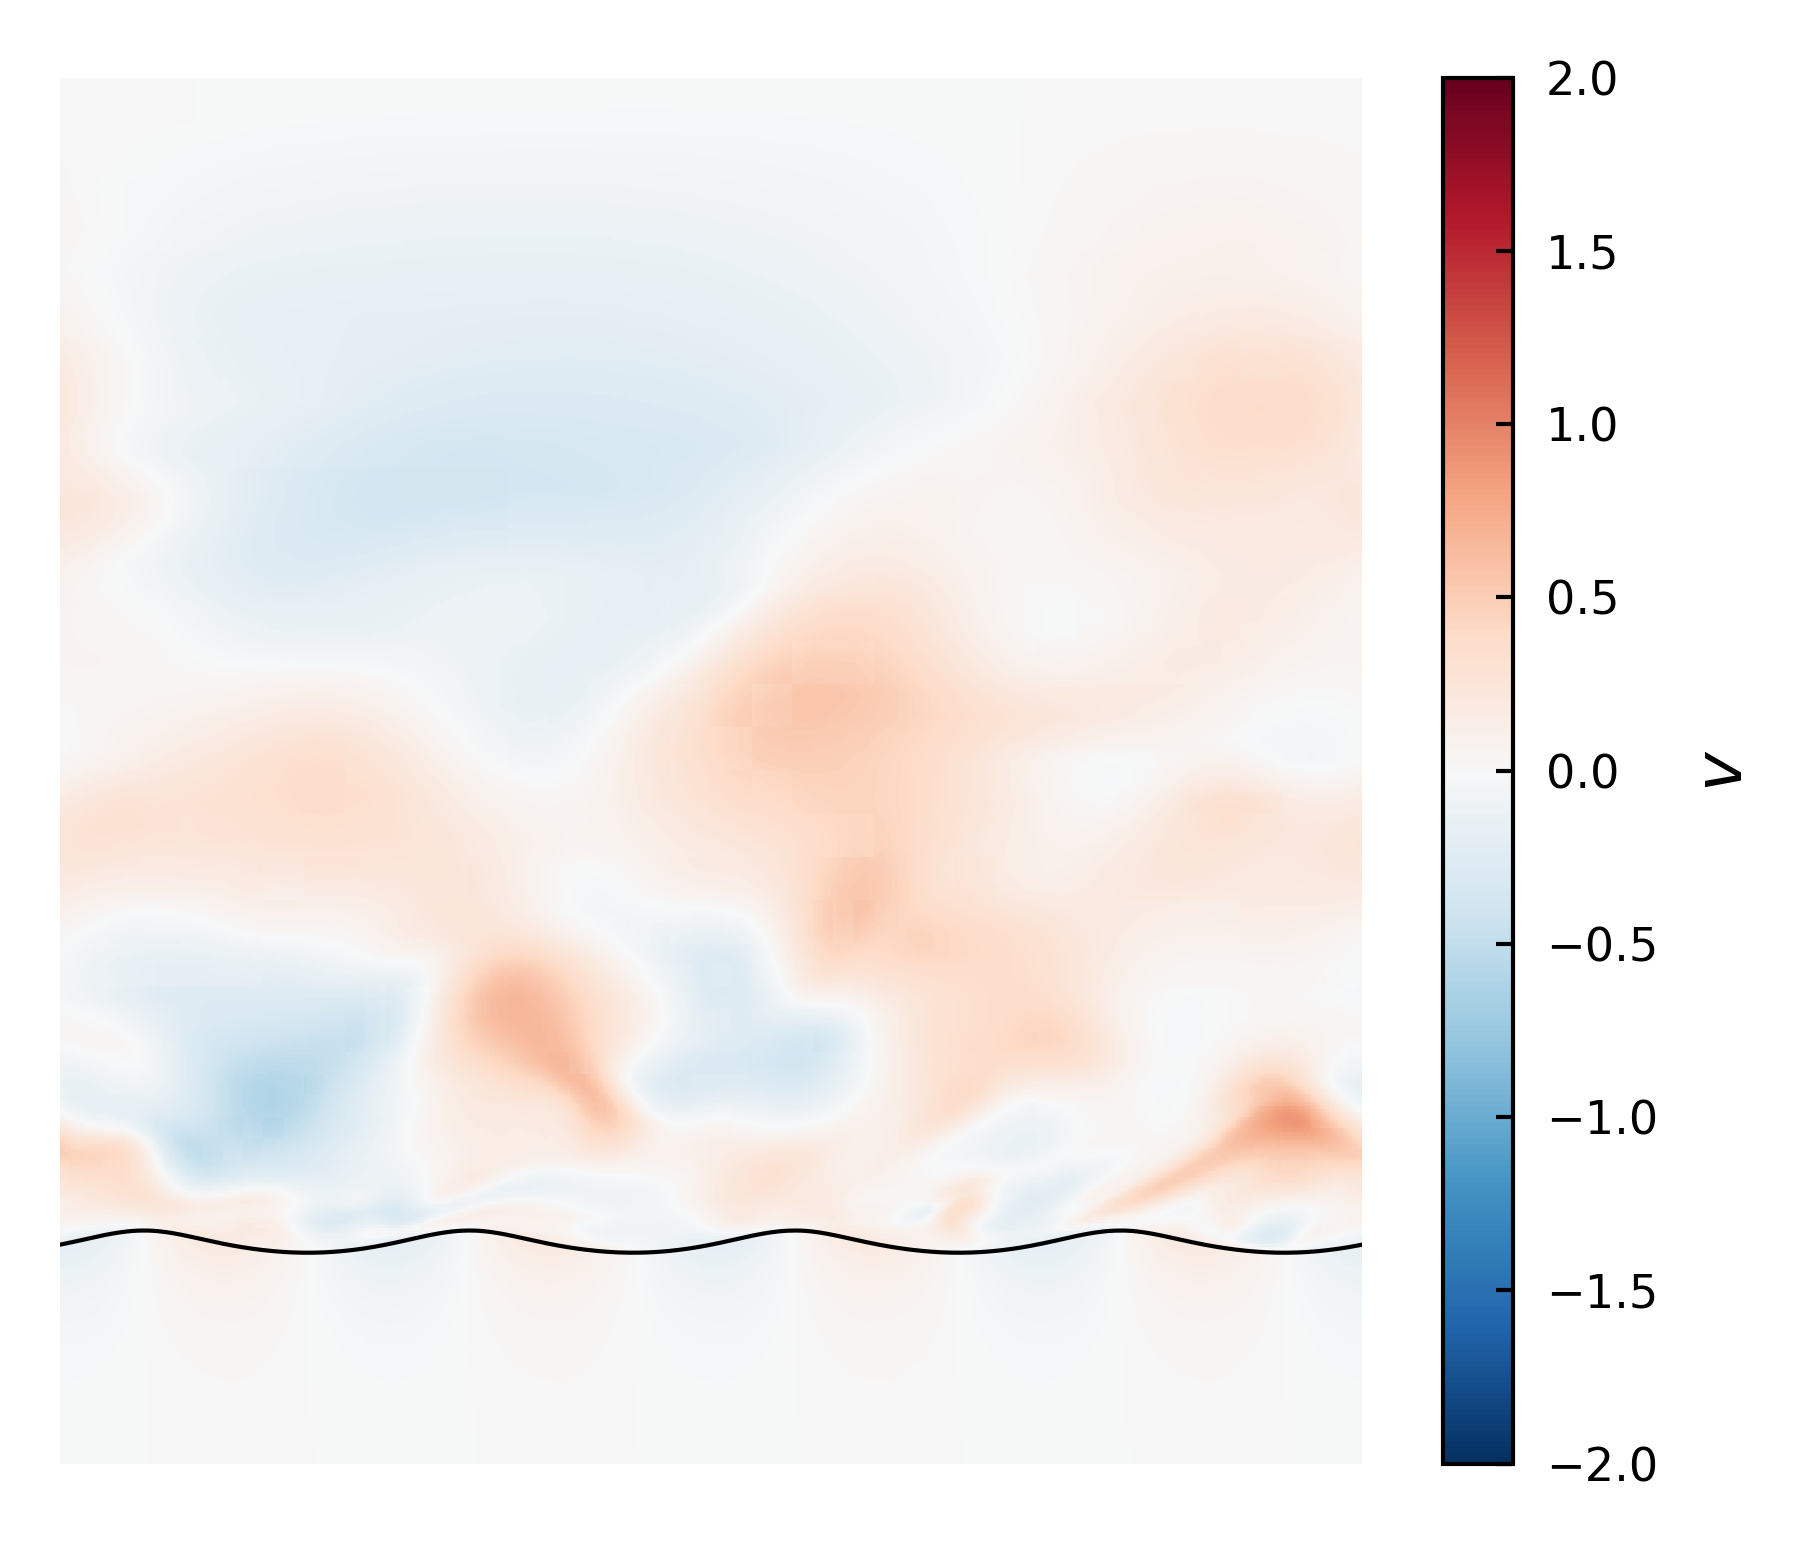

In [32]:
# fig = plt.figure(figsize=[3.5,3]); ax = plt.gca()
# ds1.ux.isel(z=400).plot(ax=ax, x='x', cmap='Blues', vmin=-0.25, vmax=6, cbar_kwargs={'label':'$u$'})
# ds1.eta.mean(dim='z').plot(ax=ax, x='x',c='k')
# ax.axis('off')
# fig.savefig('../../plots/illustration-1.pdf')

fig = plt.figure(figsize=[3.5,3]); ax = plt.gca()
ds1.uy.isel(z=400).plot(ax=ax, x='x', cmap='RdBu_r', vmin=-2, vmax=2, cbar_kwargs={'label':'$v$'})
ds1.eta.mean(dim='z').plot(ax=ax, x='x',c='k')
ax.axis('off')
fig.savefig('../../plots/illustration-2.pdf')

Text(0, 0.5, 'Horizontal flux')

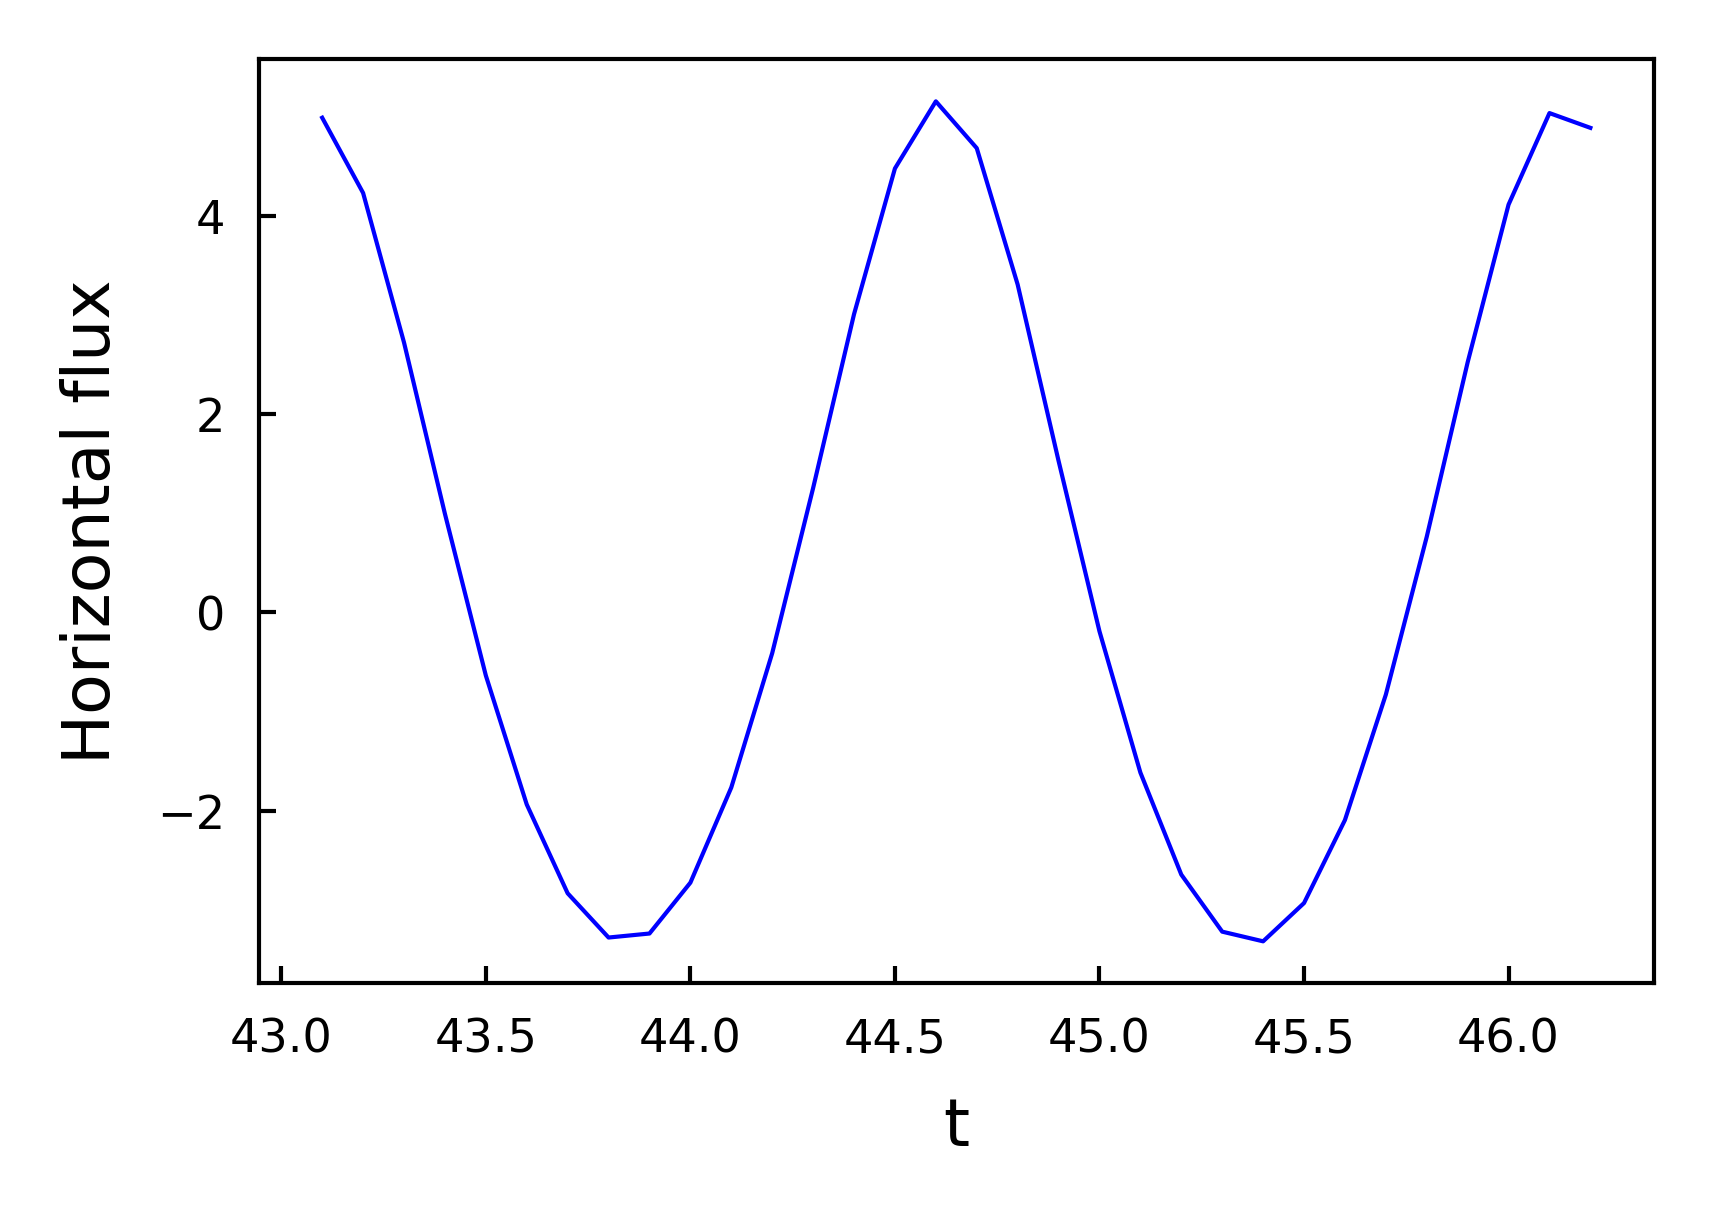

In [92]:
''' Whether there is a mean inflow. '''
uxw = ds.ux*ds.f
inflow = uxw.isel(x=0).sum(dim='y')
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
inflow.plot()
ax.set_title('')
ax.set_ylabel('Horizontal flux')